## I've written this as a function, make sure you have analysis.py in your same folder

### from analysis import sentimentify

#### Check out Graphs.ipynb for a fun treat :3

In [2]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Read the file

filename = "Raw_Data/season1.json"
with open(filename, "r") as data_file:
    data = json.load(data_file)

In [4]:
# Extract files and set up

topandas = []
eptitles = []
for episode in data.keys():
    eptitles.append(episode[16:-4])
    for key, line in data[episode].items():
#         lines.append(line)
        results = analyzer.polarity_scores(line)
        if results["compound"] != 0:
            topandas.append({
                "Ep": episode[16:-4], #Remove Game of Thrones & .srt from string
                "Line": line,
                "Compound": results["compound"],
                "Positive": results["pos"],
                "Neutral": results["neu"],
                "Negative": results["neg"],
                "Sequence": key,
                "Positive?": results["compound"] > 0
            })

In [5]:
df = pd.DataFrame(topandas)
df = df[["Ep", "Sequence", "Line", "Compound", "Positive", "Neutral", "Negative", "Positive?"]]
df = df.sort_values(by="Sequence")
df.head(1)

,Ep,Sequence,Line,Compound,Positive,Neutral,Negative,Positive?
0,S01E01 Winter Is Coming,1,"Easy, boy.",0.4404,0.744,0.256,0.0,True


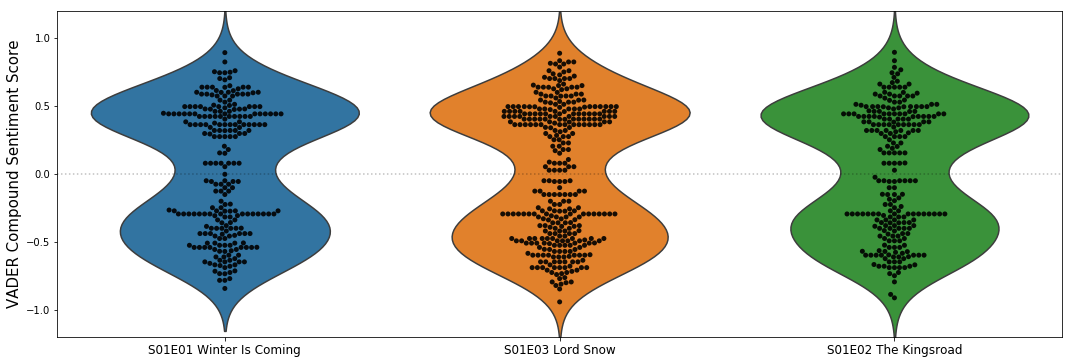

In [6]:
# Plot each episode
plt.close()
plt.figure(figsize=(18,6))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Ep',y='Compound',data=df[df['Ep'].isin(eptitles[:3])],inner=None)
sns.swarmplot(x="Ep", y="Compound",data=df[df['Ep'].isin(eptitles[:3])], color="black", alpha=.9)
plt.hlines(0, -10, 10, alpha=.25, linestyle=":")
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season1_1.png')
plt.show()

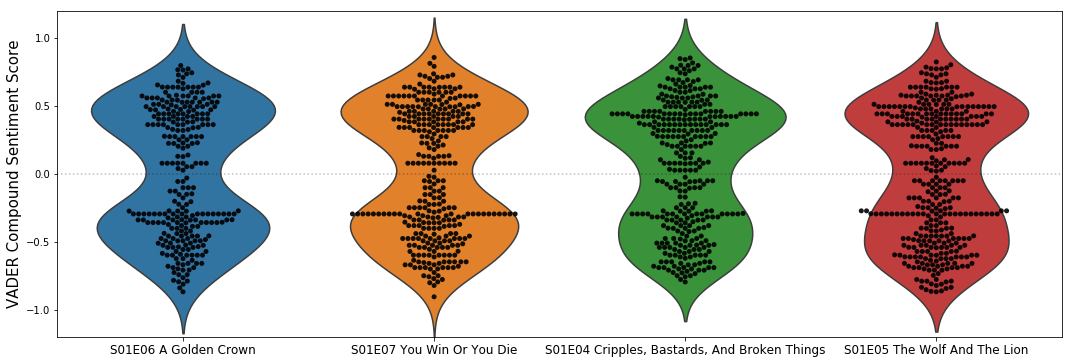

In [7]:
plt.close()
plt.figure(figsize=(18,6))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Ep',y='Compound',data=df[df['Ep'].isin(eptitles[3:7])],inner=None)
sns.swarmplot(x="Ep", y="Compound",data=df[df['Ep'].isin(eptitles[3:7])], color="black", alpha=.9)
plt.hlines(0, -10, 10, alpha=.25, linestyle=":")
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season1_2.png')
plt.show()

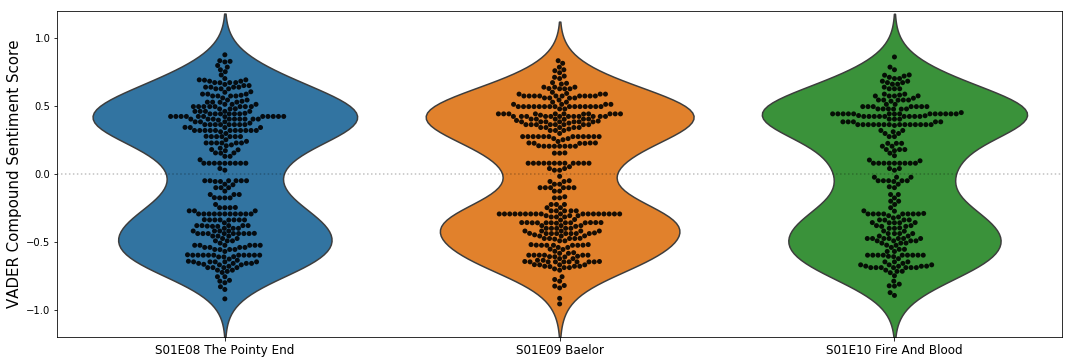

In [8]:
plt.close()
plt.figure(figsize=(18,6))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Ep',y='Compound',data=df[df['Ep'].isin(eptitles[7:])],inner=None)
sns.swarmplot(x="Ep", y="Compound",data=df[df['Ep'].isin(eptitles[7:])], color="black", alpha=.9)
plt.hlines(0, -10, 10, alpha=.25, linestyle=":")
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season1_3.png')
plt.show()

In [44]:
# Positive sentiments only mean df
positive_df = df[df['Positive?']==True].groupby('Ep')['Compound'].mean() #.sort_values(ascending=False)

# Negative sentiments only mean df
negative_df = df[df["Positive?"]==False].groupby("Ep")["Compound"].mean() #.sort_values(ascending=True)

# All sentiments mean df
mean_df = df.groupby("Ep")["Compound"].mean() #.sort_values(ascending=False)

colors = ["red", "gray", "yellow", "green", "gold", "black", "blue", "purple", "orange", "pink"]
edges = ["black", "black", "black", "black", "black", "black", "black", "black", "black", "black"]

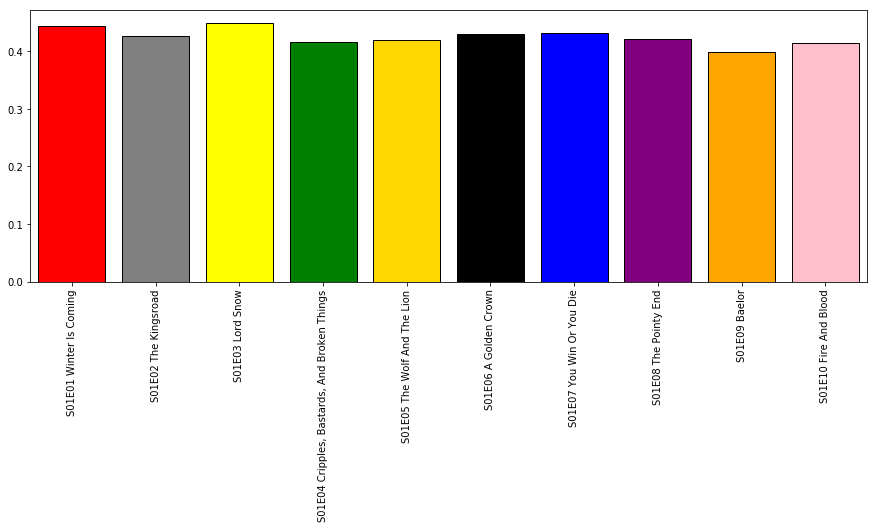

In [64]:
fig, ax = plt.subplots(figsize=(15, 5))
pos_rect = ax.bar(np.arange(len(positive_df)), positive_df, color=colors, edgecolor=edges)
ax.set_xticks(np.arange(len(positive_df)))
ax.set_xticklabels(positive_df.keys(), rotation = 90)
ax.set_xlim(-0.5, len(positive_df) - 0.5)

plt.show()

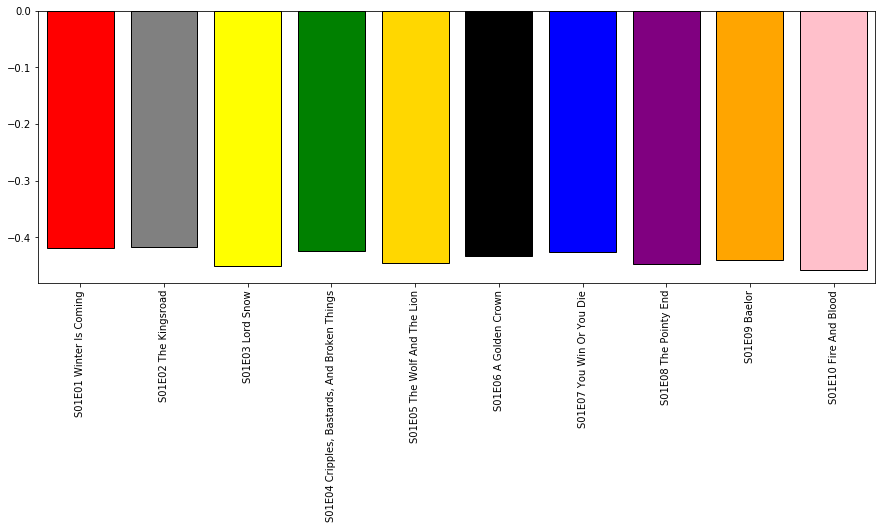

In [68]:
plt.close()
fig, ax = plt.subplots(figsize=(15, 5))
neg_rect = ax.bar(np.arange(len(negative_df)), negative_df, color=colors, edgecolor=edges)
ax.set_xticks(np.arange(len(negative_df)))
ax.set_xticklabels(negative_df.keys(), rotation = 90)
ax.set_xlim(-0.5, len(positive_df) - 0.5)

plt.show()

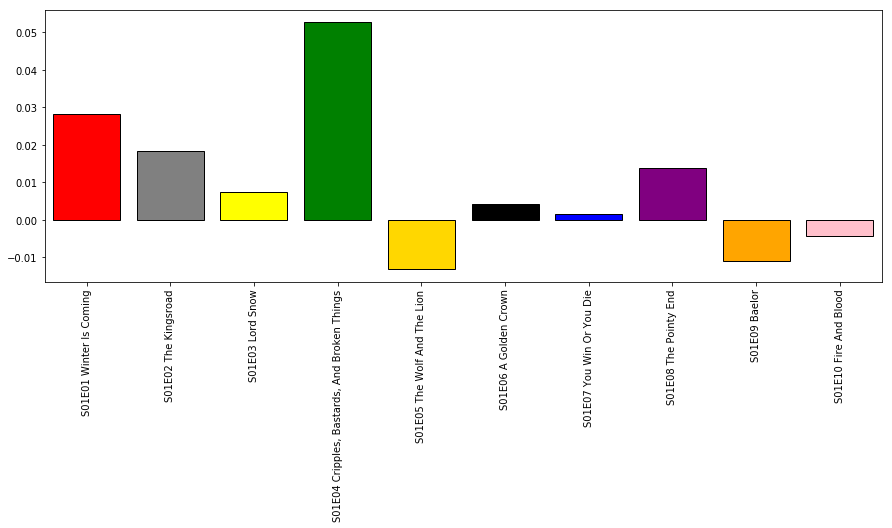

In [66]:
plt.close()
fig, ax = plt.subplots(figsize=(15, 5))
mean_green_rect = ax.bar(np.arange(len(mean_df)), mean_df, color=colors, edgecolor=edges)
ax.set_xticks(np.arange(len(mean_df)))
ax.set_xticklabels(mean_df.keys(), rotation = 90)
ax.set_xlim(-0.5, len(positive_df) - 0.5)

plt.show()

In [ ]:
# # Let's not plot sentiment over time / episode
# plt.close()
# graph = sns.FacetGrid(df, row="Ep", size = 6, aspect = 2)
# cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
# graph.map(sns.kdeplot, "Sequence", "Compound", cmap=cmap, shade=True)
# plt.savefig("Fingerprints.png")
# plt.show()

In [5]:
# # Make a DF of average values because..?

mean_df = pd.DataFrame({
    "S01E1": ep1_df["compound"].mean(),
    "S01E2": ep2_df["compound"].mean(),
    "S01E3": ep3_df["compound"].mean(),
    "S01E4": ep4_df["compound"].mean(),
    "S01E5": ep5_df["compound"].mean(),
    "S01E6": ep6_df["compound"].mean(),
    "S01E7": ep7_df["compound"].mean(),
    "S01E8": ep8_df["compound"].mean(),
    "S01E9": ep9_df["compound"].mean(),
    "S01E10": ep10_df["compound"].mean()
}, index=["Compound Score"])
mean_df

mean_df.to_csv("Season1.csv", sep=',', encoding='utf-8')